In [12]:
%matplotlib inline

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.00298222  0.00257952 ...,  0.00230454  0.0025256   0.        ]
 [ 0.          0.00680859  0.00589684 ...,  0.00323842  0.00288753  0.        ]
 ..., 
 [ 0.          0.06429785  0.11279683 ...,  0.06202925  0.11588951  0.        ]
 [ 0.          0.08467624  0.00870733 ...,  0.09273338  0.07020751  0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


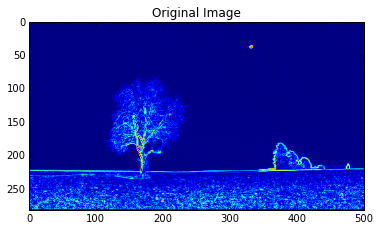

In [13]:
from skimage import data, draw,color, data, restoration
from skimage import transform, util
import numpy as np
from skimage import filters, color
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageEnhance
import matplotlib.animation as animation
from scipy.misc import imresize
from scipy import ndimage as nd


img =  plt.imread('countryside.jpg')

img = util.img_as_float(img)
grad = filters.sobel(color.rgb2gray(img))
print grad
plt.title('Original Image')
plt.imshow(grad)

In [14]:
#normalitzacio d'imatge
def normalitzar(image):
    return np.real((image - np.min(image)) * 256 / (np.max(image) - np.min(image)))

In [15]:

#Calcul matriu d'energia que te cada zona
def energia(im):
    height,width = im.shape
    energia=np.zeros(im.shape)
    #asignem la primera linea igual que la imatge que tenim
    energia[0]=im[0]   
    for x in range(1,height):
        for y in range(0,width):
            if y == 0:
                min_val = min( energia[x-1, y], energia[x-1, y+1] )
            elif y < width - 2:
                min_val = min( energia[x-1, y], energia[x-1, y+1] )
                min_val = min( min_val, energia[x-1, y-1] )
            else:
                min_val = min( energia[x-1, y], energia[x-1, y-1] )
            energia[x,y] = im[x,y] + min_val
    return energia
            
    
    

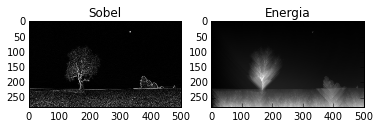

In [16]:
#grad=normalitzar(grad)
E = energia(grad)
#print energy
plt.subplot(1,2,1)
plt.imshow(normalitzar(grad), cmap="gray")
plt.title('Sobel')
plt.subplot(1,2,2)
plt.imshow(normalitzar(E), cmap="gray" )
plt.title('Energia')



In [65]:
# El calcul del tall vertical hem de buscar el cami amb cost minim. BACKTRACKING
# Aquest tall pot ser vertical o horitzontal, es un camí de pixels connectats. En el nostre cas l'apliquem vertical
# La función de importancia / energía valora un píxel mediante la medición de su contraste con sus píxeles vecinos.
# Des de la imatge en escala de grisos retornarem el tall vertical mes baix com a llista de pixels

# Algoritme recursiu que calcula el cami mes curt i retorna una llista amb les posicions pero o te que pasar.
def tall_vertical(fila, column, imatge, llista):
    if fila == 0: 
        return llista
    else:
        # Mirem quin es el minim i l'asignem a variable fila i column
        if column == 0:
            min_val = min( imatge[fila-1, column], imatge[fila-1, column+1] )
            if min_val == imatge[fila-1, column+1]:
                column = column + 1            
        elif column < imatge.shape[1] - 2:
            min_val = min( imatge[fila-1,column-1], imatge[fila-1,column] )
            min_val = min( min_val, imatge[fila-1,column+1] )
            if min_val == imatge[fila-1, column-1]:
                column = column - 1 
            elif min_val == imatge[fila-1, column+1]:
                column = column + 1 
        else:
            min_val = min( imatge[fila-1, column], imatge[fila-1, column-1] )
            if min_val == imatge[fila-1, column-1]:
                column = column - 1 
      
        llista.append(tall_vertical(fila-1, column, imatge, llista))
        return (fila-1, column)    

h, w = E.shape
linia = []
linia = E[h-1]
liniaOrdenada = sorted(linia)

pos = np.where(linia == min(linia))
llistaPos=[]
# Pimera iteracio
llistaPos.append(tall_vertical(h, pos[0][0], E, llistaPos))
print llistaPos

(0, 0)


In [48]:
#ALGORITHM try(v1,...,vi)
#   IF (v1,...,vi) is a solution THEN RETURN (v1,...,vi)
#   FOR each v DO
#      IF (v1,...,vi,v) is acceptable vector  THEN
#        sol = try(v1,...,vi,v)
#        IF sol != () THEN RETURN sol
#      END
#   END
#   RETURN () 
path = [(0, 1), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (29, 0), (30, 0), (31, 0), (32, 0), (33, 0), (34, 0), (35, 0), (36, 0), (37, 0), (38, 0), (39, 0), (40, 0), (41, 0), (42, 0), (43, 0), (44, 0), (45, 0), (46, 0), (47, 0), (48, 0), (49, 0), (50, 0), (51, 0), (52, 0), (53, 0), (54, 0), (55, 0), (56, 0), (57, 0), (58, 0), (59, 0), (60, 0), (61, 0), (62, 0), (63, 0), (64, 0), (65, 0), (66, 0), (67, 0), (68, 0), (69, 0), (70, 0), (71, 0), (72, 0), (73, 0), (74, 0), (75, 0), (76, 0), (77, 0), (78, 0), (79, 0), (80, 0), (81, 0), (82, 0), (83, 0), (84, 0), (85, 0), (86, 0), (87, 0), (88, 0), (89, 0), (90, 0), (91, 0), (92, 0), (93, 0), (94, 0), (95, 0), (96, 0), (97, 0), (98, 0), (99, 0), (100, 0), (101, 0), (102, 0), (103, 0), (104, 0), (105, 0), (106, 0), (107, 0), (108, 0), (109, 0), (110, 0), (111, 0), (112, 0), (113, 0), (114, 0), (115, 0), (116, 0), (117, 0), (118, 0), (119, 0), (120, 0), (121, 0), (122, 0), (123, 0), (124, 0), (125, 0), (126, 0), (127, 0), (128, 0), (129, 0), (130, 0), (131, 0), (132, 0), (133, 0), (134, 0), (135, 0), (136, 0), (137, 0), (138, 0), (139, 0), (140, 0), (141, 0), (142, 0), (143, 0), (144, 0), (145, 0), (146, 0), (147, 0), (148, 0), (149, 0), (150, 0), (151, 0), (152, 0), (153, 0), (154, 0), (155, 0), (156, 0), (157, 0), (158, 0), (159, 0), (160, 0), (161, 0), (162, 0), (163, 0), (164, 0), (165, 0), (166, 0), (167, 0), (168, 0), (169, 0), (170, 0), (171, 0), (172, 0), (173, 0), (174, 0), (175, 0), (176, 0), (177, 0), (178, 0), (179, 0), (180, 0), (181, 0), (182, 0), (183, 0), (184, 0), (185, 0), (186, 0), (187, 0), (188, 0), (189, 0), (190, 0), (191, 0), (192, 0), (193, 0), (194, 0), (195, 0), (196, 0), (197, 0), (198, 0), (199, 0), (200, 0), (201, 0), (202, 0), (203, 0), (204, 0), (205, 0), (206, 0), (207, 0), (208, 0), (209, 0), (210, 0), (211, 0), (212, 0), (213, 0), (214, 0), (215, 0), (216, 0), (217, 0), (218, 0), (219, 0), (220, 0), (221, 0), (222, 0), (223, 0), (224, 0), (225, 0), (226, 0), (227, 0), (228, 0), (229, 0), (230, 0), (231, 0), (232, 0), (233, 0), (234, 0), (235, 0), (236, 0), (237, 0), (238, 0), (239, 0), (240, 0), (241, 0), (242, 0), (243, 0), (244, 0), (245, 0), (246, 0), (247, 0), (248, 0), (249, 0), (250, 0), (251, 0), (252, 0), (253, 0), (254, 0), (255, 0), (256, 0), (257, 0), (258, 0), (259, 0), (260, 0), (261, 0), (262, 0), (263, 0), (264, 0), (265, 0), (266, 0), (267, 0), (268, 0), (269, 0), (270, 0), (271, 0), (272, 0), (273, 0), (274, 0), (275, 0), (276, 0), (277, 0), (278, 0), (279, 0), (280, 1)]
print path

[(0, 1), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (29, 0), (30, 0), (31, 0), (32, 0), (33, 0), (34, 0), (35, 0), (36, 0), (37, 0), (38, 0), (39, 0), (40, 0), (41, 0), (42, 0), (43, 0), (44, 0), (45, 0), (46, 0), (47, 0), (48, 0), (49, 0), (50, 0), (51, 0), (52, 0), (53, 0), (54, 0), (55, 0), (56, 0), (57, 0), (58, 0), (59, 0), (60, 0), (61, 0), (62, 0), (63, 0), (64, 0), (65, 0), (66, 0), (67, 0), (68, 0), (69, 0), (70, 0), (71, 0), (72, 0), (73, 0), (74, 0), (75, 0), (76, 0), (77, 0), (78, 0), (79, 0), (80, 0), (81, 0), (82, 0), (83, 0), (84, 0), (85, 0), (86, 0), (87, 0), (88, 0), (89, 0), (90, 0), (91, 0), (92, 0), (93, 0), (94, 0), (95, 0), (96, 0), (97, 0), (98, 0), (99, 0), (100, 0), (101, 0), (102, 0), (103, 0), (104, 0), (105, 0), (106, 0), (107, 0), (108, 0), (109, 0), (110, 0),

(281, 95)


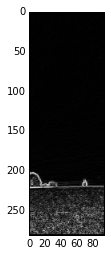

In [67]:
def borrar_cami (img, path):
    height, width = img.shape[:2]
    img_retallada = np.zeros((height, width-1))
    path_cpy = set(path)
    visitat = set()
    for x in range(height):
        for y in range(width):
            if (x,y) not in path_cpy and x not in visitat:
                img_retallada[x,y] = img[x,y]
            elif (x,y) in path_cpy:
                visitat.add(x)
            else:
                img_retallada[x,y-1] = img[x,y]
    #print "Deletion Complete."
    return img_retallada;
            
for t in range (100): 
    #####################Aqui es te que cridar la funcio que et crea el cami perque cada vegada et borri el que toca. Ara nomes borra el 
    #####################De l'esquerra sempre
    grad=borrar_cami(grad,path)
plt.imshow(normalitzar(grad), cmap="gray")
print grad.shape

In [58]:
    i=path
    #print "Deleting Vertical Seam..."
    img_height, img_width = img.shape[:2] 
    print img_height, img_width 
    #i = np.zeros((img_height, img_width-1, img.shape[2]))
                 
    #path_set = set(path)
    seen_set = set()
    print seen_set
    for x in range(img_height):
        for y in range(img_width):
            if (x,y) not in path and x not in seen_set:
                i[x,y] = img[x,y]
    #        elif (x,y) in path_set:
    #            seen_set.add(x)
    #        else:
    #            i[x,y-1] = img[x,y]
    #print "Deletion Complete."

281 500
set([])


TypeError: list indices must be integers, not tuple